# Zomato Restaurants in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('zomato_restaurants_in_India.csv')
df.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [4]:
df.shape

(211944, 26)

In [5]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [10]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [14]:
#na NA replace unknown or missing

# Preprocessing

In [ ]:
#dropping missing values from four columns

In [15]:
df = df.dropna(subset=['address','timings','cuisines','opentable_support'], axis=0)

In [20]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [18]:
df.shape

(207021, 26)

In [19]:
#dropping zipcode
df = df.drop('zipcode', axis = 1) 

In [24]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.070210e+05,207021.000000,207021.000000,207021.000000,207021.0,207021.000000,207021.000000,207021.000000,207021.000000,207021.000000,207021.0,207021.000000,207021.0
mean,1.337761e+07,4640.061762,21.485940,77.612413,1.0,603.767768,1.896696,3.431203,386.434883,262.830466,0.0,-0.251743,-1.0
std,7.928959e+06,5549.972214,23.025185,7.411938,0.0,610.022547,0.894505,1.247813,934.565266,877.039972,0.0,0.965370,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.202169e+06,11.000000,15.493801,74.878378,1.0,250.000000,1.000000,3.300000,18.000000,4.000000,0.0,-1.000000,-1.0
50%,1.869425e+07,33.000000,22.523532,77.402449,1.0,400.000000,2.000000,3.800000,107.000000,19.000000,0.0,-1.000000,-1.0
75%,1.880546e+07,11304.000000,26.835986,80.219323,1.0,700.000000,2.000000,4.100000,374.000000,134.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


# Exploratory Data Analysis

City with most restaurants

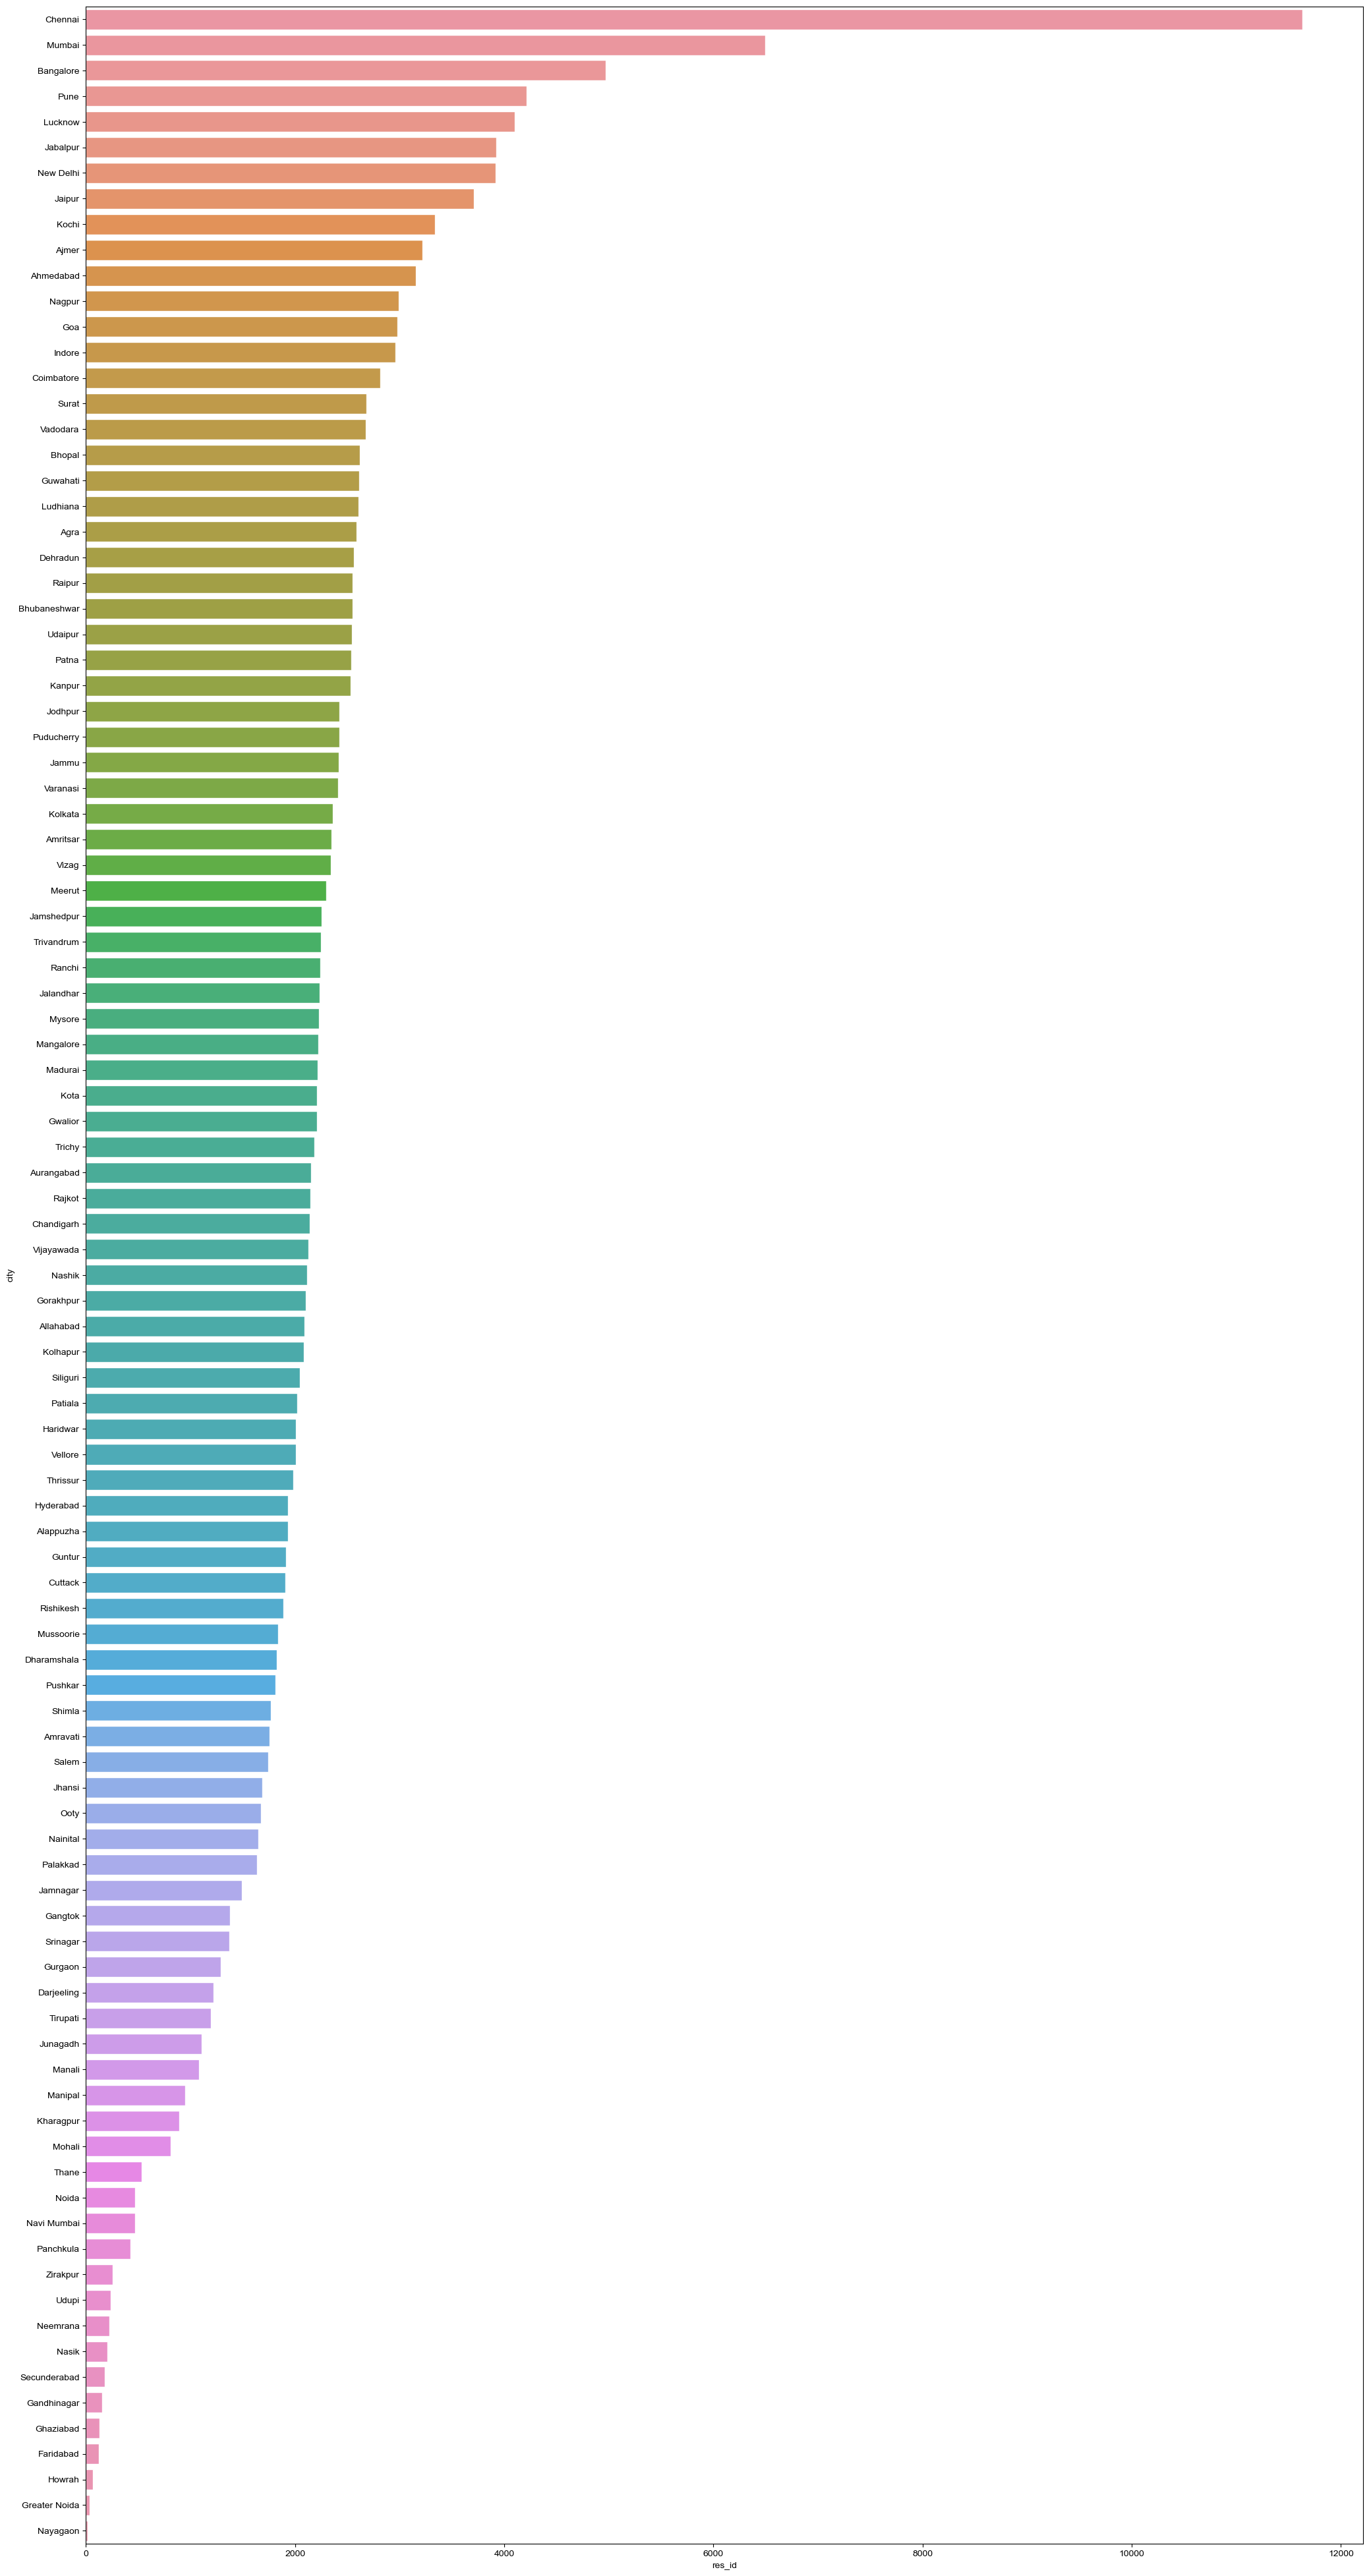

In [25]:
city_df = df.loc[:,['res_id','city']]
res_by_city = city_df.groupby('city').count()
res_by_city.sort_values('res_id',ascending=False,inplace=True)
fig,axes =  plt.subplots()
fig.set_size_inches(25,50)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 20,'axes.labelsize':42})
res_by_city_plot = sns.barplot(x='res_id',y=res_by_city.index,data=res_by_city,ax=axes)

revealing top five cities with most restaurats

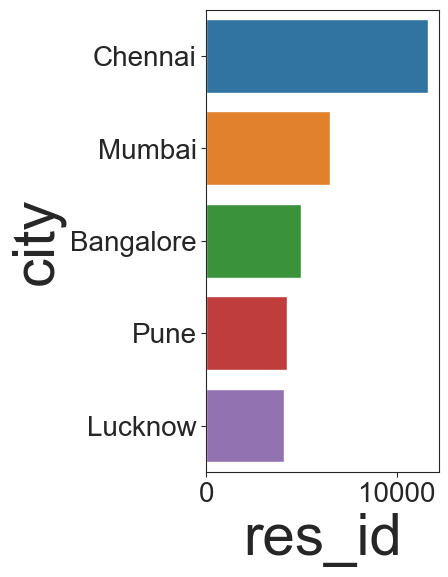

In [26]:
city_df = df.loc[:,['res_id','city']]
res_by_city = city_df.groupby('city').count()
res_by_city.sort_values('res_id',ascending=False,inplace=True)
# Select the 5 cities
res_by_city = res_by_city.head(5)
fig,axes =  plt.subplots()
fig.set_size_inches(3,6)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 20,'axes.labelsize':42})
res_by_city_plot = sns.barplot(x='res_id',y=res_by_city.index,data=res_by_city,ax=axes)

Distribution of restaurant ratings

<Axes: xlabel='aggregate_rating', ylabel='res_id'>

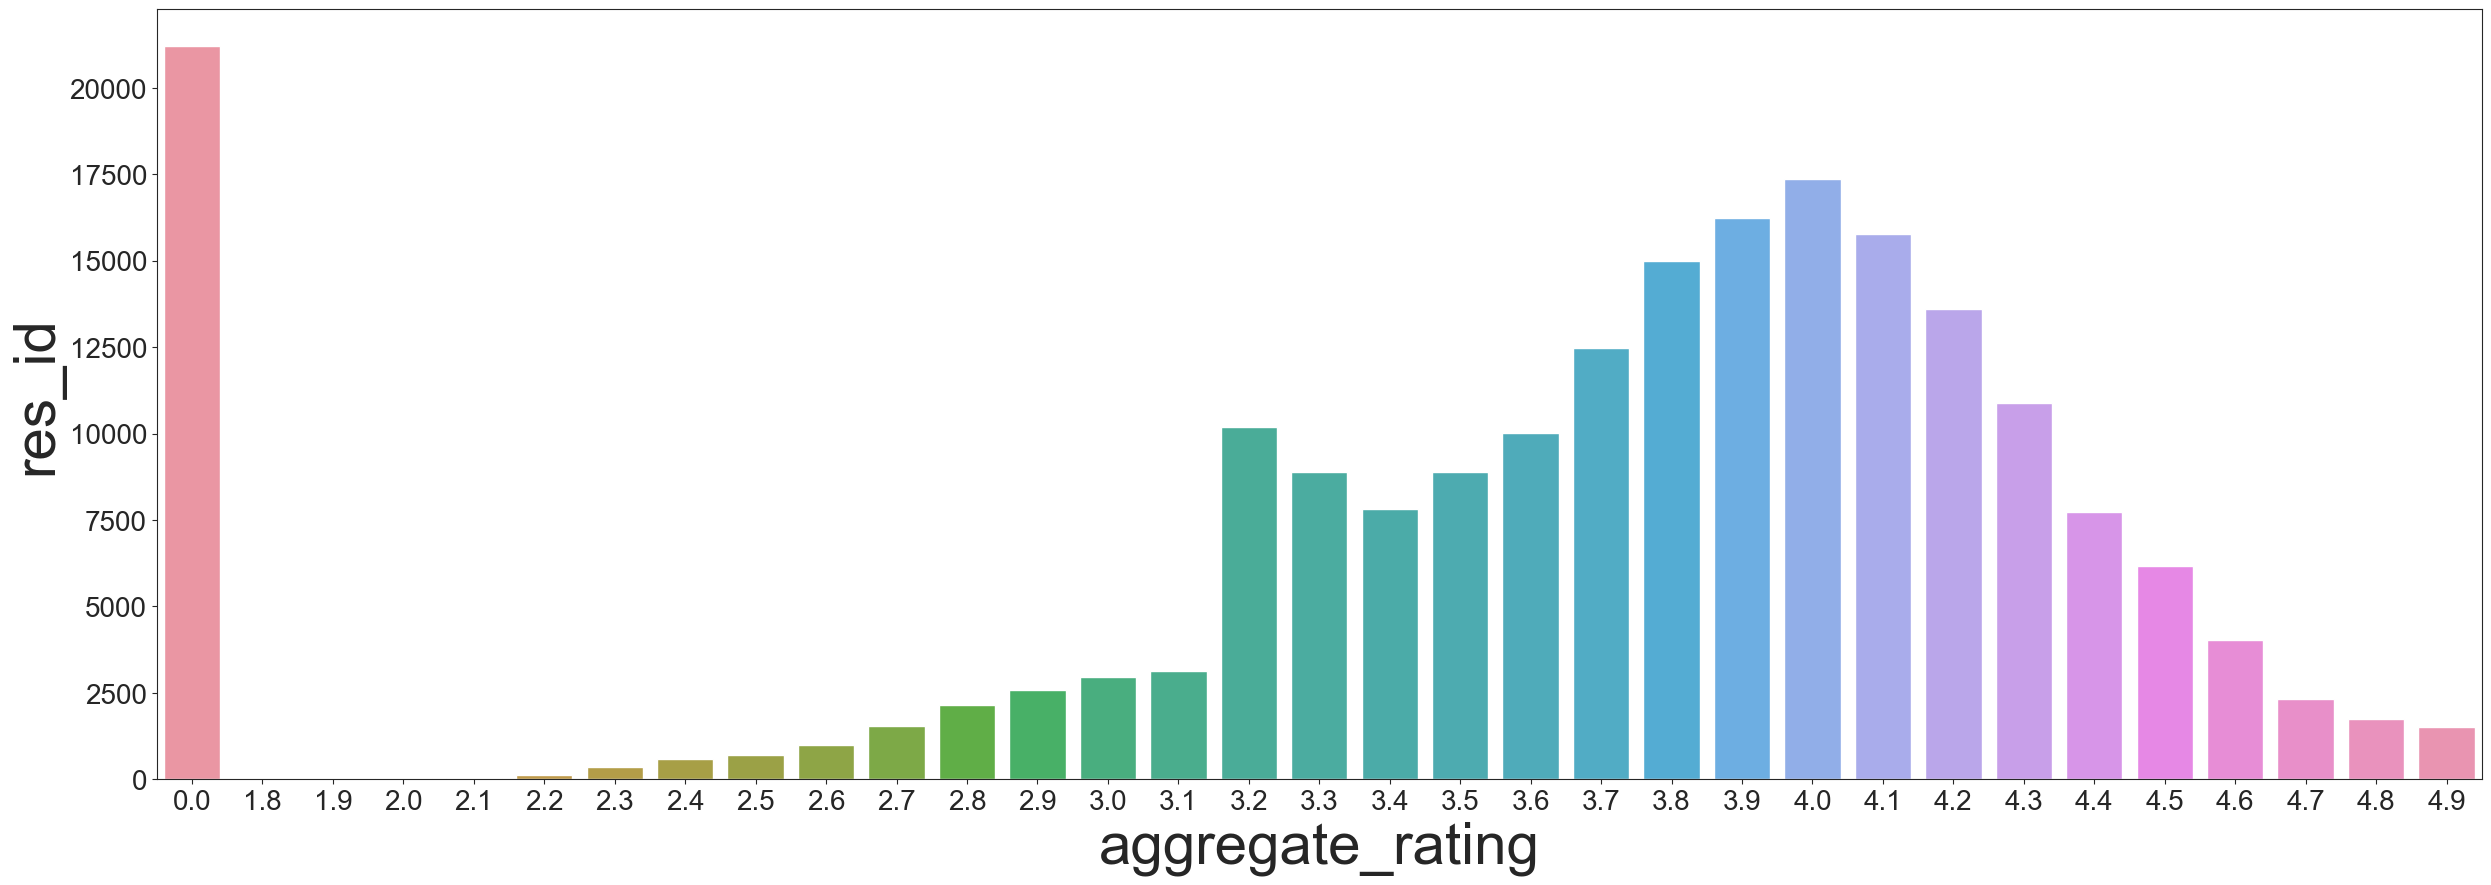

In [27]:
res_by_ratings = df.loc[:,['res_id','aggregate_rating']]
res_by_ratings = res_by_ratings.groupby('aggregate_rating').count()
res_by_ratings.sort_values('res_id',ascending=False,inplace=True)
res_by_ratings.head()
fig,axes =  plt.subplots()
fig.set_size_inches(30,10)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 28,'axes.labelsize':42})
sns.barplot(x=res_by_ratings.index,y=res_by_ratings.res_id,data=res_by_ratings,ax=axes)

Does cost effect ratings

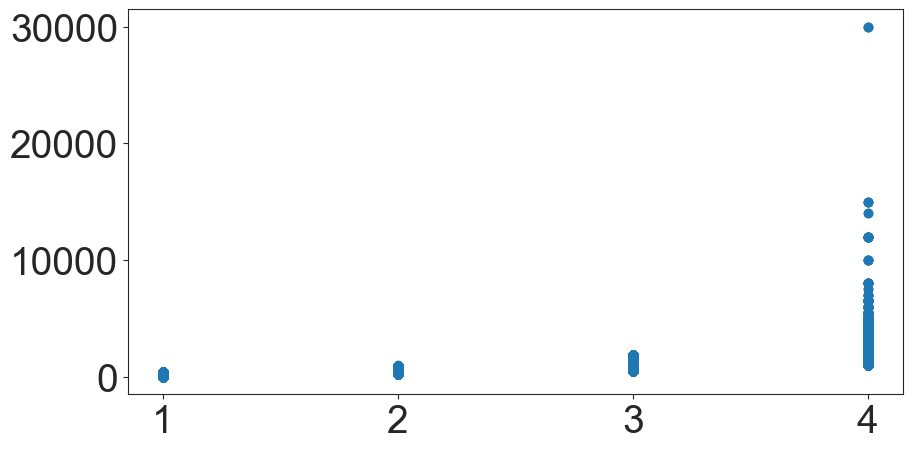

In [28]:
price_category = df[df['average_cost_for_two']<4000]
fig,axes =  plt.subplots()
fig.set_size_inches(10,5)
axes.scatter(x='price_range',y='average_cost_for_two',data=df)

Its evident that restaurants with ratings 4.0 costs between 2000-5000 for two

<Axes: xlabel='rating_text', ylabel='price_range'>

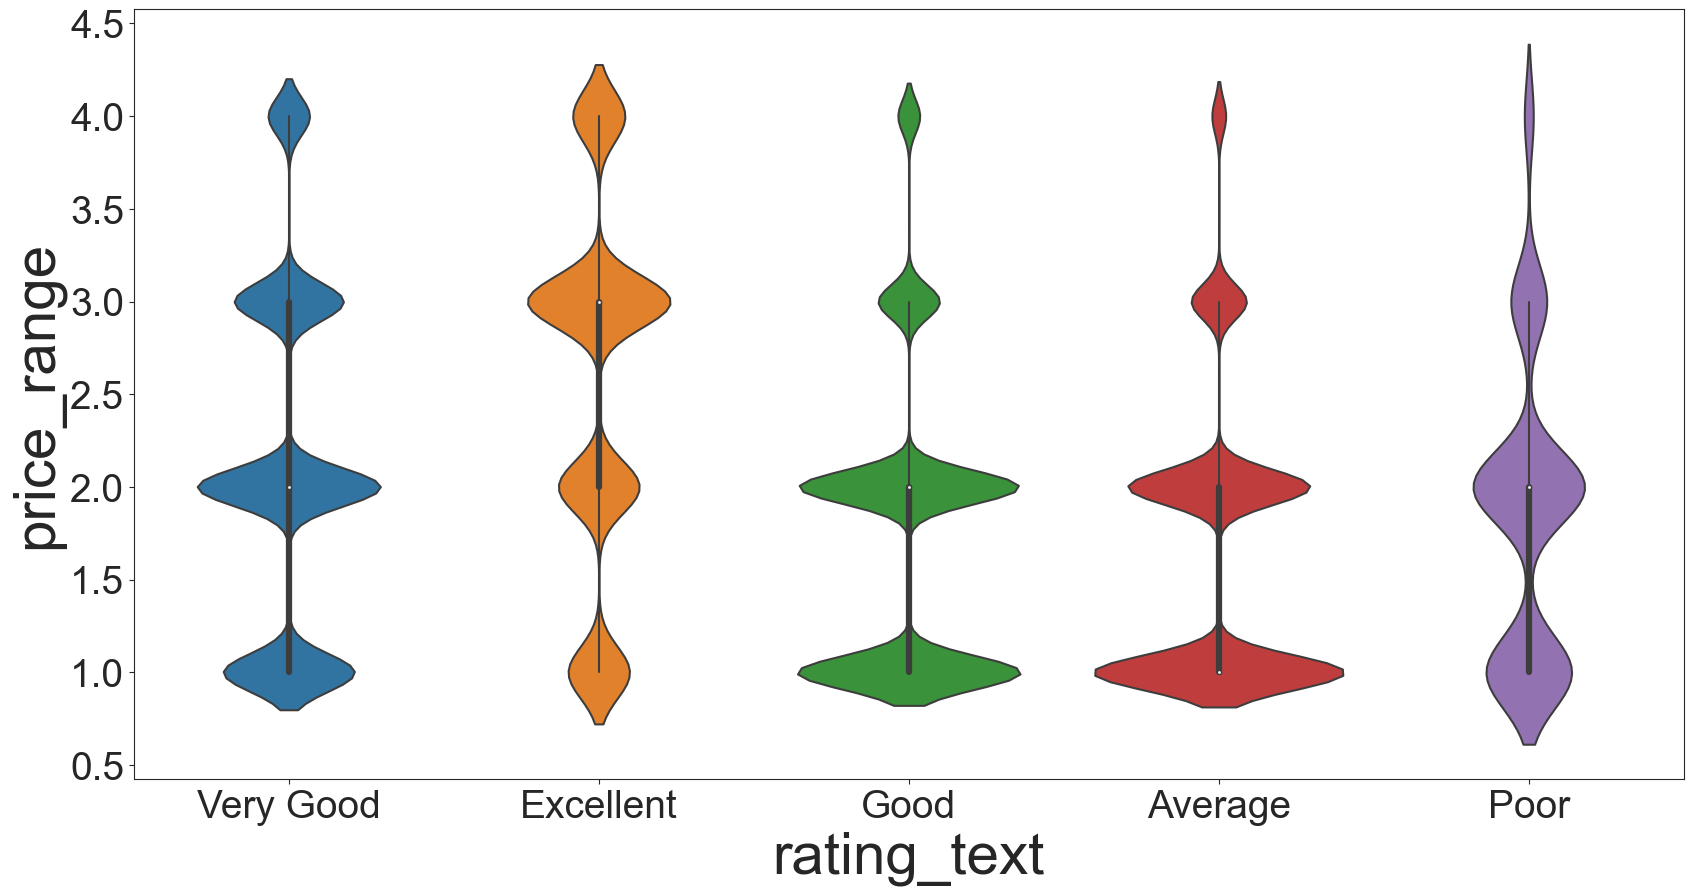

In [29]:
cost_vs_ratings = df.loc[:,['rating_text','price_range','city']]
cost_vs_ratings.groupby('rating_text').count()
cost_vs_ratings = cost_vs_ratings[cost_vs_ratings['rating_text'].isin(['Average','Excellent','Good','Poor','Very Good'])]
fig,axes = plt.subplots()
fig.set_size_inches(20,10)
sns.violinplot(x='rating_text',y='price_range',data=cost_vs_ratings)


cheap restaurants are rated average and good while those restaurants with average price range rated very good, good and average
but costly restaurant are rated very good and excellent

on the other hand cheap restaurants have negative(poor) ratings too

<Axes: xlabel='None-rating_range', ylabel='price_range'>

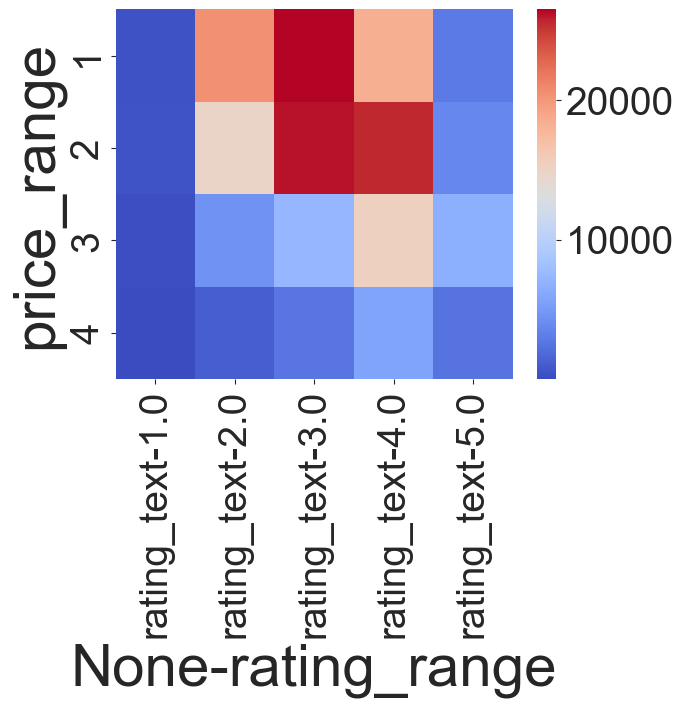

In [30]:
cost_vs_ratings = df.loc[:,['rating_text','price_range','res_id']]
cost_vs_ratings['rating_range'] = cost_vs_ratings['rating_text'].map({'Poor':1,'Average':2,'Good':3,'Very Good':4,'Excellent':5})
cost_vs_ratings.drop('res_id',axis=1,inplace=True)
sns.heatmap(cost_vs_ratings.pivot_table(index=['price_range'],columns="rating_range",aggfunc="count"),cmap="coolwarm")

Distribution of restaurants by price range

In [31]:
res_by_cost_for_two = df.loc[:,['res_id','price_range']]
res_by_cost_for_two = res_by_cost_for_two.groupby('price_range',as_index=False).count()
res_by_cost_for_two.sort_values('res_id',ascending=False,inplace=True)
res_by_cost_for_two

,price_range,res_id
0,1,82073
1,2,76808
2,3,35593
3,4,12547


<Axes: xlabel='price_range', ylabel='res_id'>

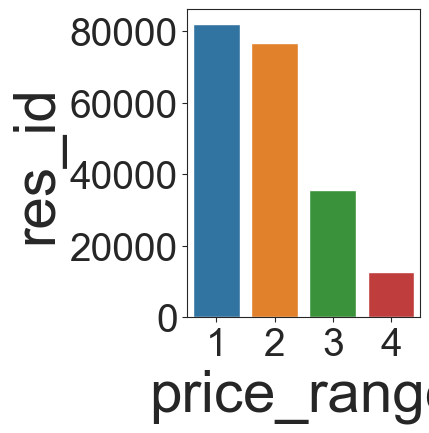

In [32]:
fig,axes =  plt.subplots()
fig.set_size_inches(3,4)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 15,'axes.labelsize':15})
sns.barplot(x=res_by_cost_for_two.price_range,y=res_by_cost_for_two.res_id,data=res_by_cost_for_two,ax=axes)

In [33]:
costliest_res = df[df['average_cost_for_two']>4000].sort_values('average_cost_for_two',ascending=False)
costliest_res.shape

(716, 25)

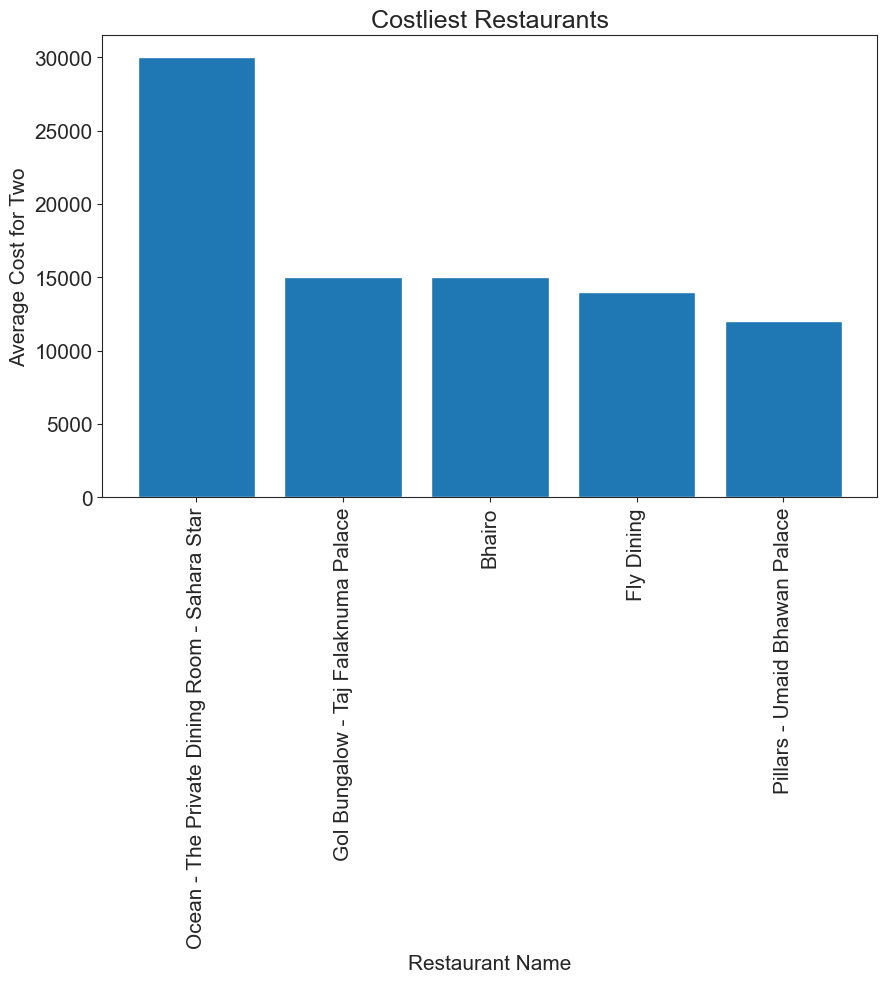

In [34]:
costliest_res = df[df['average_cost_for_two']>4000].sort_values('average_cost_for_two',ascending=False)
costliest_res = costliest_res.head(10)

plt.figure(figsize=(10,6))
plt.bar(x=costliest_res['name'], height=costliest_res['average_cost_for_two'])
plt.xticks(rotation=90)
plt.xlabel("Restaurant Name")
plt.ylabel("Average Cost for Two")
plt.title("Costliest Restaurants")
plt.show()

    this plot is clearly showing costliest restaurants

Lets see which city has costliest restaurants

<Axes: xlabel='average_cost_for_two', ylabel='city'>

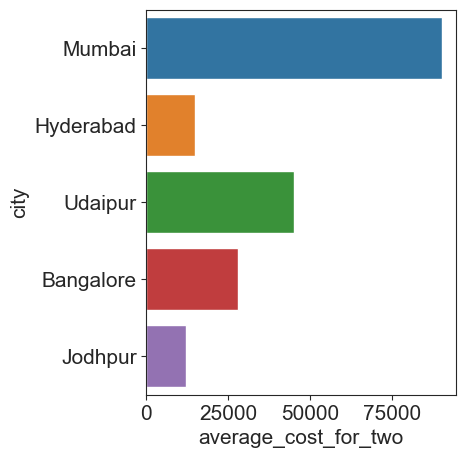

In [35]:
fig,axes =  plt.subplots()
fig.set_size_inches(4,5)
sns.set_style('ticks')
plt.rcParams.update({'font.size': 15,'axes.labelsize':15})
sns.barplot(x="average_cost_for_two",y="city",data=costliest_res,estimator=sum,ax=axes)

Mumbai and udaipur has most costly restaurants

Cuisines offered by restaurants

cuisinesCount = df['cuisines'].value_counts()
cuisinesCountDf = cuisinesCount.to_frame('count').reset_index()
cuisinesCountDf.rename(columns={'index':'cuisines'}, inplace=True)
cuisinesCountDf.sort_values(by="count",ascending=False,inplace=True)

fig,axes = plt.subplots()
fig.set_size_inches(20,40)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 15,'axes.labelsize':15})
sns.barplot(y="cuisines",x="count",data=cuisinesCountDf,ax=axes)